In [1]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

# Analysing Stocks:
## 1. Preparing data - 


In [2]:
# reading nifty-50 & preparing symbols
nifty50 = pd.read_csv("../data/nifty_200.csv")
symbols = nifty50["Symbol"] + ".NS"
symbols = symbols.to_list()

symbols

['ABB.NS',
 'ACC.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'AWL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ALKEM.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTRAL.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALKRISIND.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BATAINDIA.NS',
 'BERGEPAINT.NS',
 'BDL.NS',
 'BEL.NS',
 'BHARATFORG.NS',
 'BHEL.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BIOCON.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'CGPOWER.NS',
 'CANBK.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'COFORGE.NS',
 'COLPAL.NS',
 'CONCOR.NS',
 'COROMANDEL.NS',
 'CROMPTON.NS',
 'CUMMINSIND.NS',
 'DLF.NS',
 'DABUR.NS',
 'DALBHARAT.NS',
 'DEEPAKNTR.NS',
 'DELHIVERY.NS',
 'DEVYANI.NS',
 'DIVISLAB.NS',
 'DIXON.NS',
 'LALPATHLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',


In [15]:
data = yf.download(symbols[3], start="2010-01-01", end="2023-12-26")
data.index.names = ['date']
data.columns = data.columns.str.lower()
data

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume
date,,,,,,
2017-07-11,268.500000,287.325012,266.200012,283.625000,282.469330,28572624
2017-07-12,288.225006,321.350006,287.500000,314.774994,313.492432,35549156
2017-07-13,326.000000,349.475006,315.049988,345.575012,344.166901,43750394
2017-07-14,348.899994,362.750000,280.549988,299.399994,298.180054,67296768
2017-07-17,295.000000,306.850006,281.174988,298.049988,296.835541,23021580
...,...,...,...,...,...,...
2023-12-18,758.250000,758.250000,743.000000,748.650024,748.650024,1843431
2023-12-19,749.549988,751.599976,730.049988,731.299988,731.299988,1743062
2023-12-20,737.400024,772.150024,734.900024,760.049988,760.049988,5717729


## 2. getting insights of data:
Since closing price is the most importe=ant indicator let's find out what can find out from it.

In [16]:
# finding out adj close
data['adj close'].describe()

count    1596.000000
mean      469.064041
std       161.915130
min       189.661850
25%       324.393005
50%       433.206314
75%       615.877136
max       789.360291
Name: adj close, dtype: float64

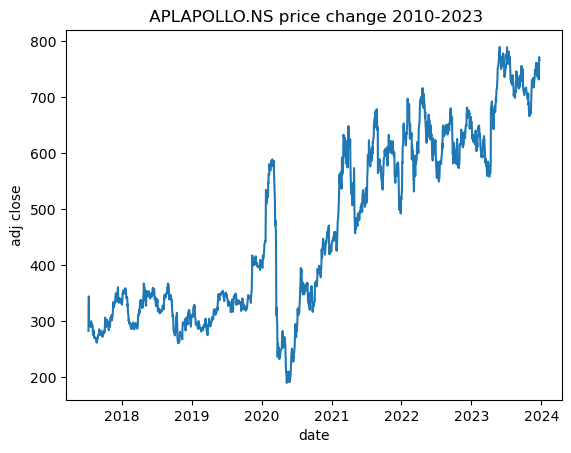

In [17]:
sn.lineplot(data=data['adj close'])
plt.title(f" {symbols[2]} price change 2010-2023")
plt.show()

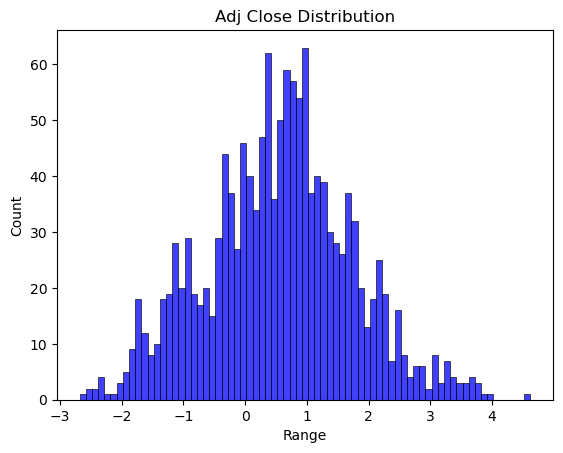

In [22]:
# let's calculate 20 day moivng average and fit normalize it with 20-day MA and std
mean = 200

ma_20 = data['adj close'].rolling(mean).mean()
std = data['adj close'].rolling(mean).std()

n_close = (data['adj close'] - ma_20) / std

# now visualize it 
sn.histplot(n_close, binwidth=0.1, color="blue")
plt.title("Adj Close Distribution")
plt.ylabel("Count")
plt.xlabel("Range")

plt.show()

## 3. Now calculate features and indicators for analysis -  
+ RSI
+ MACD 
+ ADX
+ ATR
+ Bollinger bands